In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
dataset = pd.read_csv("nba_2017_br.csv")
del(dataset['Pos'])
del(dataset['Tm'])
X=dataset.iloc[:,2:30].values
print(X.shape)


(486, 26)


In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer=imputer.fit(X)
X=imputer.transform(X)
print(X)

[[28.  81.  81.  ...  5.4  2.3 31.6]
 [27.  81.  81.  ...  5.7  2.7 29.1]
 [27.  76.  76.  ...  2.8  2.2 28.9]
 ...
 [23.   5.   0.  ...  0.6  0.8  0. ]
 [23.   1.   0.  ...  0.   0.   0. ]
 [23.   3.   0.  ...  0.   0.   0. ]]


In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
print(X)

[[ 0.36736984  1.09692201  1.94139106 ...  5.50992423  0.84121569
   3.82920497]
 [ 0.1369934   1.09692201  1.94139106 ...  5.89417207  1.38415171
   3.41609882]
 [ 0.1369934   0.89541607  1.76709193 ...  2.17977631  0.70548168
   3.38305033]
 ...
 [-0.78451236 -1.96596817 -0.88225486 ... -0.63804116 -1.1947944
  -1.39245672]
 [-0.78451236 -2.12717291 -0.88225486 ... -1.40653684 -2.28066644
  -1.39245672]
 [-0.78451236 -2.04657054 -0.88225486 ... -1.40653684 -2.28066644
  -1.39245672]]


In [4]:
ds=pd.DataFrame( pd.DataFrame({'Column1': X[:, 0],
                               'Column2': X[:, 1],
                              'Column3': X[:, 2],
                              'Column4': X[:, 3],
                              'Column5': X[:, 4],
                              'Column6': X[:, 5],
                              'Column7': X[:, 6],
                              'Column8': X[:, 7],
                              'Column9': X[:, 8],
                              'Column10': X[:, 9],
                              'Column11': X[:, 10],
                              'Column12': X[:, 11],
                              'Column13': X[:, 12],
                              'Column14': X[:, 13],
                              'Column15': X[:, 14],
                              'Column16': X[:, 15],
                              'Column17': X[:, 16],
                              'Column18': X[:, 17],
                              'Column19': X[:, 18],
                              'Column20': X[:, 19],
                              'Column21': X[:, 20],
                              'Column22': X[:, 21],
                              'Column23': X[:, 22],
                              'Column24': X[:, 23],
                              'Column25': X[:, 24],
                              'Column26': X[:, 25]}))


In [5]:
corr = ds.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26
Column1,1,0.0601763,0.0186428,0.0712198,0.0155719,0.0249444,0.000773417,0.111468,0.0960975,0.033231,-0.0297767,-0.0219169,-0.000311873,0.0615799,0.0121145,-0.00465385,0.159523,-0.0426285,0.0506703,0.0250985,0.114575,0.049007,-0.0889386,0.0308823,-0.00598931,0.0276212
Column2,0.0601763,1,0.588545,0.680711,0.559625,0.539339,0.294937,0.403055,0.398012,0.205626,0.502815,0.483697,0.252827,0.366704,0.385798,0.395533,0.183154,0.30193,0.51477,0.476413,0.367152,0.521406,0.293374,0.445462,0.57074,0.541145
Column3,0.0186428,0.588545,1,0.818079,0.756525,0.734794,0.229082,0.461076,0.455061,0.118882,0.715291,0.708684,0.174999,0.242218,0.617916,0.634912,0.142262,0.444327,0.669825,0.635822,0.511923,0.633401,0.413522,0.635085,0.61705,0.74329
Column4,0.0712198,0.680711,0.818079,1,0.880876,0.884784,0.242785,0.638009,0.642352,0.235375,0.791457,0.799976,0.204011,0.308733,0.699128,0.708896,0.224696,0.381731,0.712404,0.64788,0.645481,0.771258,0.38115,0.754495,0.716667,0.87317
Column5,0.0155719,0.559625,0.756525,0.880876,1,0.979059,0.295286,0.61388,0.610285,0.218106,0.943528,0.942162,0.239147,0.316919,0.839948,0.844112,0.233078,0.391688,0.696095,0.638667,0.641707,0.657944,0.393861,0.812118,0.599081,0.987757
Column6,0.0249444,0.539339,0.734794,0.884784,0.979059,1,0.149966,0.693318,0.704553,0.25672,0.885354,0.91639,0.117455,0.204495,0.841203,0.828315,0.293447,0.274129,0.62872,0.551822,0.684068,0.673305,0.293611,0.826477,0.55924,0.983155
Column7,0.000773417,0.294937,0.229082,0.242785,0.295286,0.149966,1,-0.0795315,-0.14173,0.0732645,0.388384,0.277119,0.826627,0.917568,0.166792,0.229549,-0.226877,0.500253,0.383552,0.441472,0.033699,0.158302,0.44944,0.161259,0.376439,0.24004
Column8,0.111468,0.403055,0.461076,0.638009,0.61388,0.693318,-0.0795315,1,0.986033,0.515772,0.318493,0.354726,-0.0262736,0.199099,0.488122,0.423733,0.384095,-0.197408,0.222278,0.102711,0.508122,0.494542,-0.0674983,0.496813,0.267735,0.677071
Column9,0.0960975,0.398012,0.455061,0.642352,0.610285,0.704553,-0.14173,0.986033,1,0.466809,0.319717,0.361748,-0.0441453,0.128515,0.504973,0.440214,0.389823,-0.212701,0.223071,0.0984108,0.525581,0.506441,-0.0804979,0.516701,0.267533,0.676924
Column10,0.033231,0.205626,0.118882,0.235375,0.218106,0.25672,0.0732645,0.515772,0.466809,1,0.0456916,0.0746509,-0.0114768,0.334267,0.144549,0.0933468,0.246902,-0.266678,-0.00863929,-0.0903975,0.214458,0.177343,-0.13803,0.145643,0.0226031,0.253613


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.components_)
pca_data = pd.DataFrame(X_pca)
print(pca_data.head())


[0.7706438  0.17719793]
[[ 5.09263151e-03  5.81126567e-01  7.54730451e-01  2.23795598e-01
   4.79856054e-02  9.78404646e-02  7.96518494e-04  1.09089054e-02
   2.77513658e-02  6.40139218e-04  3.71194505e-02  7.01474383e-02
   7.08751885e-04  9.01504185e-04  2.49124655e-02  3.08601702e-02
   7.21988683e-04  9.30530738e-03  3.52458759e-02  4.45465518e-02
   2.64964026e-02  7.82182283e-03  4.85165133e-03  1.44083318e-02
   1.41139328e-02  1.31976218e-01]
 [ 1.35765637e-02  8.05268647e-01 -5.84136974e-01 -3.70428111e-02
  -1.95586233e-02 -4.15262658e-02  5.98070350e-04 -1.00685792e-03
  -2.63192568e-03  8.11949144e-04 -1.86049867e-02 -3.90316095e-02
   7.07010185e-04  9.88839663e-04 -1.78998083e-02 -2.22287413e-02
   4.72301929e-04 -4.91853696e-03 -1.10717377e-02 -1.59621139e-02
  -1.23289027e-02 -1.45052229e-03 -2.20663421e-03 -7.30566321e-03
   7.76330893e-04 -5.79105672e-02]]
           0          1
0  68.720126 -14.559406
1  67.527516 -13.886647
2  59.694351 -14.670957
3  59.922961 -15.

In [145]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

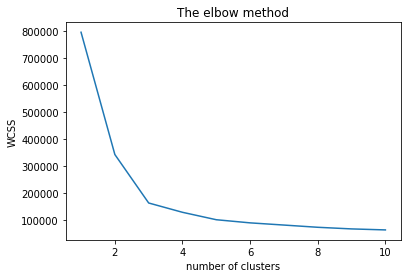

In [146]:
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()



In [10]:
kmeans = KMeans(n_clusters = 3, init= 'k-means++', max_iter = 300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(X_pca)

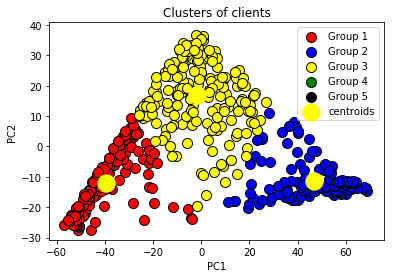

In [11]:
# Visualising the clusters
plt.scatter(X_pca[y_kmeans==0,0], X_pca[y_kmeans==0,1], s=100, c='red', label='Group 1',edgecolors='black')
plt.scatter(X_pca[y_kmeans==1,0], X_pca[y_kmeans==1,1], s=100, c='blue', label='Group 2',edgecolors='black')
plt.scatter(X_pca[y_kmeans==2,0], X_pca[y_kmeans==2,1], s=100, c='yellow', label='Group 3',edgecolors='black')
plt.scatter(X_pca[y_kmeans==3,0], X_pca[y_kmeans==3,1], s=100, c='green', label='Group 4',edgecolors='black')
plt.scatter(X_pca[y_kmeans==4,0], X_pca[y_kmeans==4,1], s=100, c='black', label='Group 5',edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title("Clusters of clients")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


In [147]:
from sklearn.cluster import MiniBatchKMeans
wcss = []
for i in range(1,11):
    kmeans = MiniBatchKMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

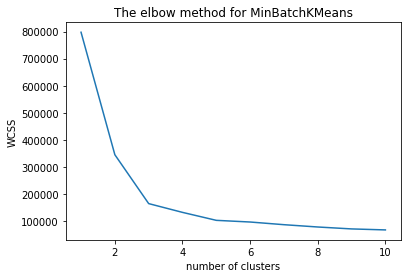

In [148]:
plt.plot(range(1,11), wcss)
plt.title("The elbow method for MinBatchKMeans")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()


In [14]:
kmeans = MiniBatchKMeans(n_clusters = 4, init= 'k-means++', max_iter = 300, n_init = 10, random_state=0)
y_min_batch_kmeans = kmeans.fit_predict(X_pca)

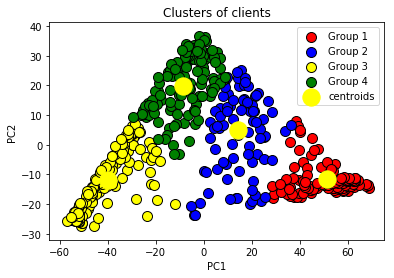

In [15]:
# Visualising the clusters
plt.scatter(X_pca[y_min_batch_kmeans==0,0], X_pca[y_min_batch_kmeans==0,1], s=100, c='red', label='Group 1',edgecolors='black')
plt.scatter(X_pca[y_min_batch_kmeans==1,0], X_pca[y_min_batch_kmeans==1,1], s=100, c='blue', label='Group 2',edgecolors='black')
plt.scatter(X_pca[y_min_batch_kmeans==2,0], X_pca[y_min_batch_kmeans==2,1], s=100, c='yellow', label='Group 3',edgecolors='black')
plt.scatter(X_pca[y_min_batch_kmeans==3,0], X_pca[y_min_batch_kmeans==3,1], s=100, c='green', label='Group 4',edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title("Clusters of clients")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

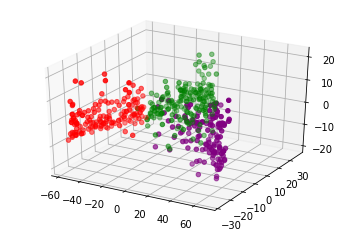

In [149]:
# %matplotlib widget
from mpl_toolkits import mplot3d
import matplotlib
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
kmeanModel_pca = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=42) 
kmeanModel_pca.fit(X_pca)
pca_pred = kmeanModel_pca.predict(X_pca)
colors = ["red", "green", "purple"]

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=pca_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

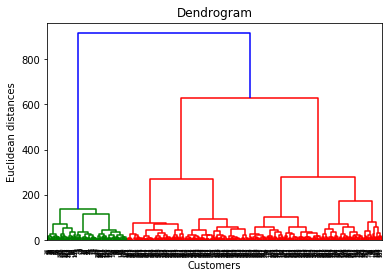

In [16]:
# Using the dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,metric='euclidean',method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()


In [17]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_pca)
print(y_hc)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0
 2 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0
 0 1 1 1 2 1 0 0 0 0 1 2 2 1 1 0 1 0 0 2 1 0 0 0 0 1 1 2 1 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 2 2 0 0 0 1 1 2 0
 1 2 0 0 0 1 0 0 0 0 2 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0
 2 1 0 0 0 2 0 0 0 0 0 0 0 1 2 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 0 2 0 1 1 2 0
 1 2 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 1 0 1 0 2 0 0 2 2 2 0 0 1 2 2 0 0 0
 0 0 2 0 2 2 2 0 2 2 0 2 0 0 0 2 2 2 0 2 0 0 2 0 2 0 2 2 2 0 2 0 0 0 0 0 2
 0 0 2 2 0 2 0 0 2 0 2 0 0 0 0 2 0 2 2 0 2 2 0 2 0 2 0 0 0 0 0 2 0 0 2 2 0
 0 2 2 2 2 0 0 2 0 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 0 0
 2 0 0 2 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]


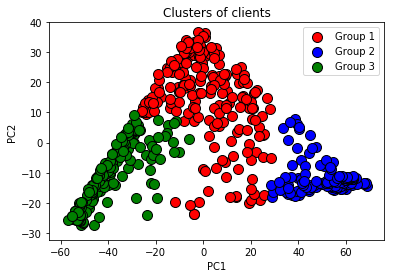

In [19]:
# Visualising the clusters
plt.scatter(X_pca[y_hc==0,0], X_pca[y_hc==0,1], s=100, c='red', label='Group 1', edgecolors='black')
plt.scatter(X_pca[y_hc==1,0], X_pca[y_hc==1,1], s=100, c='blue', label='Group 2', edgecolors='black')
plt.scatter(X_pca[y_hc==2,0], X_pca[y_hc==2,1], s=100, c='green', label='Group 3', edgecolors='black')
plt.title("Clusters of clients")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


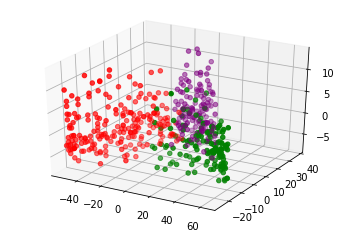

In [87]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_corr)
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
pca_pred = hc.fit_predict(X_pca)
colors = ["red", "green", "purple"]

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=pca_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

In [22]:
X_corr=X[:,[0,1,2,6,7,9,10,11,16,17,18,20,21,22,24]].copy()

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_corr = pca.fit_transform(X_corr)
print(pca.explained_variance_ratio_)
print(pca.components_)
pca_data = pd.DataFrame(X_pca_corr)
print(pca_data.head())

[0.78399874 0.19472419]
[[ 5.07818782e-03  6.12640993e-01  7.84731254e-01  8.31907756e-04
   1.08333774e-02  6.33817574e-04  3.73409785e-02  7.03159809e-02
   7.14481098e-04  9.67688621e-03  3.60019317e-02  2.63950275e-02
   7.93298328e-03  5.01500115e-03  1.44869457e-02]
 [ 1.37359415e-02  7.89839317e-01 -6.11501743e-01  5.83840996e-04
  -6.62238913e-04  8.44830028e-04 -1.79584551e-02 -3.75433165e-02
   5.11240395e-04 -5.20762452e-03 -1.12596154e-02 -1.16333234e-02
  -1.43933647e-03 -2.31289504e-03  6.17277185e-04]]
           0          1
0  61.930556 -13.261751
1  61.279492 -12.942958
2  54.074647 -13.774748
3  53.510450 -14.418630
4  51.988878 -14.507762


In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_corr)
    wcss.append(kmeans.inertia_)

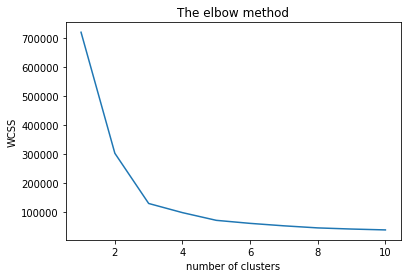

In [25]:
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init= 'k-means++', max_iter = 300, n_init = 10, random_state=0)
y_kmeans_corr = kmeans.fit_predict(X_pca_corr)
print(y_kmeans_corr)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 1 0 2 1 2 0 2 2 1 2
 0 1 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 2 1 1 1 2 1 2 1
 1 2 2 2 0 2 1 1 1 2 2 0 0 2 2 1 2 1 1 0 2 1 1 1 1 2 2 0 2 1 2 1 2 1 1 2 2
 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 2 1 2 1 2 1 1 1 0 0 1 1 1 2 2 0 1
 2 1 1 1 1 2 2 2 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 2 1 1 2 2 1 1 1 0 2 1 1 1
 0 2 1 1 2 0 1 1 1 1 1 1 1 2 0 1 2 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 2 2 0 1
 2 0 1 2 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 2 1 2 1 1 1 1 0 0 1 1 1 2 0 0 1 1 1
 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 2 1 1 0
 1 1 0 0 2 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 2 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


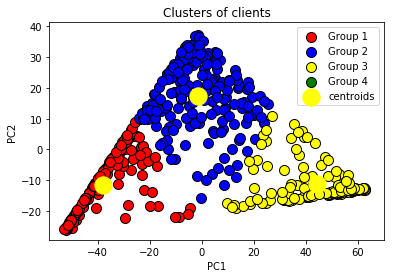

In [27]:
# Visualising the clusters
plt.scatter(X_pca_corr[y_kmeans_corr==0,0], X_pca_corr[y_kmeans_corr==0,1], s=100, c='red', label='Group 1',edgecolors='black')
plt.scatter(X_pca_corr[y_kmeans_corr==1,0], X_pca_corr[y_kmeans_corr==1,1], s=100, c='blue', label='Group 2',edgecolors='black')
plt.scatter(X_pca_corr[y_kmeans_corr==2,0], X_pca_corr[y_kmeans_corr==2,1], s=100, c='yellow', label='Group 3',edgecolors='black')
plt.scatter(X_pca_corr[y_kmeans_corr==3,0], X_pca_corr[y_kmeans_corr==3,1], s=100, c='green', label='Group 4',edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title("Clusters of clients")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

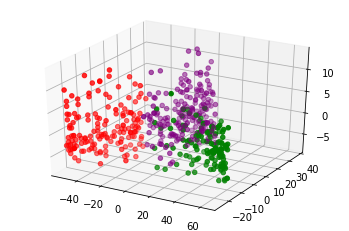

In [85]:
# %matplotlib widget
from mpl_toolkits import mplot3d
import matplotlib
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_corr)
kmeanModel_pca = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=42) 
kmeanModel_pca.fit(X_pca)
pca_pred = kmeanModel_pca.predict(X_pca)
colors = ["red", "green", "purple"]

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=pca_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

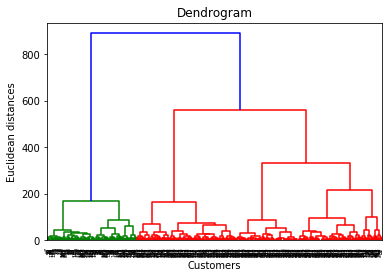

In [28]:
# Using the dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_corr,metric='euclidean',method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [29]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_pca_corr)
print(y_hc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 0 1 2 1 0 1 1 2 1
 0 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 2 2 1 1 1 2
 2 1 1 1 0 1 0 1 2 1 1 0 0 1 1 0 1 2 2 0 1 2 2 2 2 1 1 0 1 2 1 2 1 1 2 1 1
 1 0 1 2 2 2 2 2 1 2 1 1 2 2 0 2 2 2 1 2 1 2 1 2 1 2 2 2 0 0 2 2 2 1 1 0 2
 1 0 2 0 2 1 1 1 2 2 0 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 1 1 2 2 2 0 1 2 0 2
 0 1 2 2 1 0 2 2 1 2 2 2 2 1 0 2 1 2 2 1 2 2 0 0 0 2 2 2 2 2 2 0 1 1 1 0 2
 1 0 2 1 2 2 2 2 2 2 2 0 0 2 2 0 0 2 0 1 2 1 2 0 2 2 0 0 0 2 2 1 0 0 2 2 2
 2 0 0 0 0 0 0 2 0 0 2 0 2 2 2 0 0 0 2 0 0 1 0 2 0 2 0 0 0 0 0 2 0 1 0 2 0
 2 2 0 0 1 0 2 0 0 2 0 0 2 2 2 0 2 0 0 2 0 0 0 0 1 0 0 2 0 0 1 0 0 2 0 0 1
 2 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


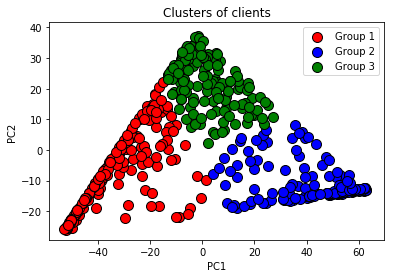

In [30]:
# Visualising the clusters
plt.scatter(X_pca_corr[y_hc==0,0], X_pca_corr[y_hc==0,1], s=100, c='red', label='Group 1', edgecolors='black')
plt.scatter(X_pca_corr[y_hc==1,0], X_pca_corr[y_hc==1,1], s=100, c='blue', label='Group 2', edgecolors='black')
plt.scatter(X_pca_corr[y_hc==2,0], X_pca_corr[y_hc==2,1], s=100, c='green', label='Group 3', edgecolors='black')
plt.title("Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


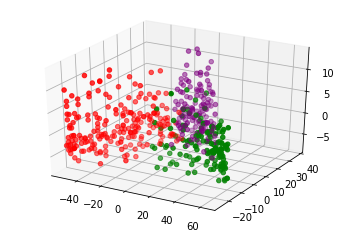

In [86]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_corr)
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
pca_pred = hc.fit_predict(X_pca)
colors = ["red", "green", "purple"]

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=pca_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

In [32]:
from sklearn import neighbors
neigh = neighbors.NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_corr)
distances, indices = nbrs.kneighbors(X_corr)

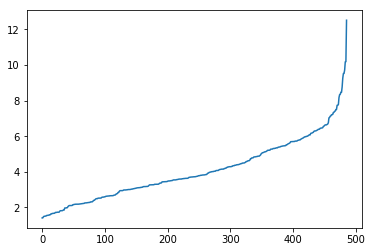

In [33]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [135]:
from sklearn.cluster import DBSCAN
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_corr)
db = DBSCAN(eps=8.9, min_samples=20).fit(X_pca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1 -1  0  0  0 -1 -1  0  0  0  0  0  0  0  1  0  0
  0 -1  0  0  1 -1  0 -1  1  0  0  0  0  0  0  0  1 -1  0  1 -1 -1  0  0
  1 -1  1  1  0  0  0  0  0  0  1 -1  1  0  0  0  0  0  0  0  0 -1  1  0
 -1  1 -1  1  0  0  0  0 -1  1  1  0 -1  0  1  1  0  0  0  1  0  1 -1  1
 -1  0  1 -1  0  0  1  0  1  1  1 -1  1  1  1  1  0  0  1  0  1  0  1 -1
 -1 -1  0 -1  0 -1  0  1  1  1  1  1 -1  1  0 -1  1  1  1 -1  1  1  0  1
 -1  1  0 -1  0  1  1  1  1  1  1  1  1  0  0 -1 -1 -1 -1  1 -1  1  0 -1
 -1  1  1  1  1 -1  1  1  1 -1  0 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1
  1 -1 -1  1  1  1  1  0  1  1 -1  1  1  1 -1  1  1  1  1  0  1  1 -1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  0  0  1  1  0  1  1  0  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  0  1  0  1  1  1  1  1  1  1
  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1

['yellow', 'blue', 'green', 'red', 'orange', 'purple', 'gray', 'pink']


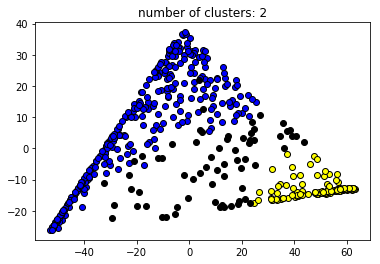

In [136]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['yellow', 'blue', 'green', 'red','orange','purple','gray','pink']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X_pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X_pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

Silhouette Coefficient: 0.286
2
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1 -1  0  0  0 -1 -1  0  0  0  0  0  0  0  1  0  0
  0 -1  0  0  1 -1  0 -1  1  0  0  0  0  0  0  0  1 -1  0  1 -1 -1  0  0
  1 -1  1  1  0  0  0  0  0  0  1 -1  1  0  0  0  0  0  0  0  0 -1  1  0
  1  1 -1  1  0  0  0  0 -1  1  1  0 -1  0  1  1  0  0  0  1  0  1 -1  1
 -1  0  1 -1  0  0  1  0  1  1  1 -1  1  1  1  1  0  0  1  0  1  0  1 -1
 -1 -1  0  1  0 -1  0  1  1  1  1  1 -1  1  0 -1  1  1  1  1  1  1  0  1
  1  1  0  1  0  1  1  1  1  1  1  1  1  0  0  1  1 -1  1  1 -1  1  0 -1
 -1  1  1  1  1  1  1  1  1  1  0 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1
  1  1 -1  1  1  1  1  0  1  1 -1  1  1  1  1  1  1  1  1  0  1  1 -1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  1  1  0  1  1  0  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  0  1  0  1  1  1  1  1  1  1
  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 

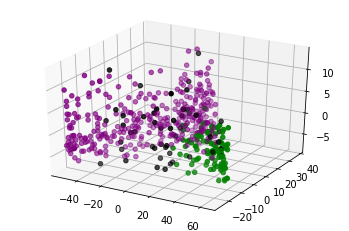

In [150]:
from sklearn import metrics 
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_corr)
db = DBSCAN(eps=8.5, min_samples=15).fit(X_pca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_corr, labels))
print(n_clusters_)
print(labels)
print(set(labels))
colors = ["black", "red", "green", "purple"]


fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

In [144]:
import hdbscan
hdb = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=15)
hdb.fit(X)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=60, min_samples=15, p=None,
        prediction_data=False)

In [78]:
print(hdb.labels_.max())

1


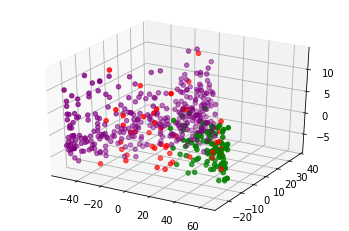

In [91]:
pca = PCA(n_components=3)
X_pca_hdb = pca.fit_transform(X_corr)
hdb = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=15)
pca_pred = hdb.fit_predict(X_pca_hdb)
colors = ["red", "green", "purple"]
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X_pca_hdb[:, 0], X_pca_hdb[:, 1], X_pca_hdb[:, 2], c=pca_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()